In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [2]:
(X_train, y_train) , (X_test, y_test) =  keras.datasets.mnist.load_data()

In [3]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0].shape

(28, 28)

In [5]:
for i in y_train[:5]:
    print(i)

5
0
4
1
9


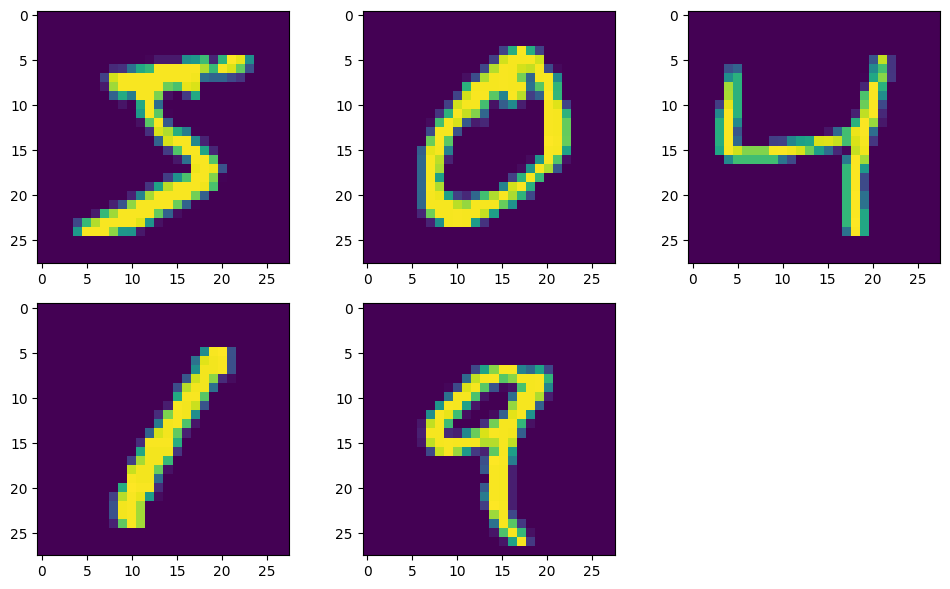

In [6]:
plt.figure(figsize=(10, 6))

i = 1
for digit in X_train[:5]:
    plt.subplot(2, 3, i)
    i+=1
    plt.imshow(digit)
    
plt.tight_layout()
plt.show()

# flatten the x_train and x_test (r , n, m) => (r , n*m)

In [7]:
X_train_flat = X_train.reshape( (  len(X_train )  , 28*28 ))
X_test_flat =  X_test.reshape( (  len(X_test )  , 28*28 ))

X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

# Scaling features for better accuracy


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_flat = sc.fit_transform(X_train_flat)
X_test_flat = sc.transform(X_test_flat)

####### or #######
# X_train = X_train / 255
# X_test = X_test / 255



# Building nerual network model with no hidden layer

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4717 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3043 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9255


In [10]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2654 - accuracy: 0.9267


[0.26537689566612244, 0.9266999959945679]

In [11]:
y_predicted = model.predict(X_test_flat)

# list of all probabilities of having actual number from 0-9 . that has maximum prob will be the actual one
y_predicted[0] 

313/313 [==============================] - 1s 3ms/step


array([2.2877514e-02, 4.2930387e-07, 4.1748371e-02, 9.5026916e-01,
       2.9471295e-03, 1.2326654e-01, 2.5445345e-06, 9.9976361e-01,
       1.0041674e-01, 6.6631997e-01], dtype=float32)

In [12]:
# get maximum value index
np.argmax(y_predicted[0]) ,y_test[0]

(7, 7)

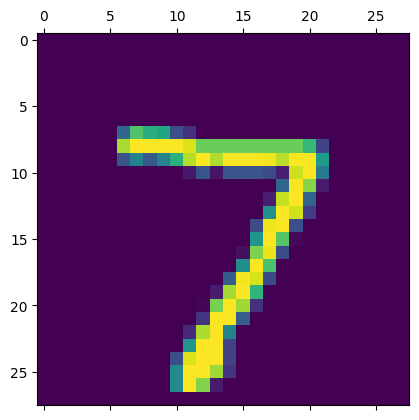

In [14]:
plt.matshow(X_test[0])

In [15]:
y_pred = [ np.argmax(y_prob) for y_prob in  model.predict(X_test_flat)] 
y_pred[:5] , y_test[:5]

313/313 [==============================] - 1s 3ms/step


([7, 2, 1, 0, 4], array([7, 2, 1, 0, 4], dtype=uint8))

In [25]:
cm = tf.math.confusion_matrix( labels=y_test , predictions=y_pred)

### or ###

# cm = confusion_matrix(y_pred , y_test)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

Text(95.72222222222221, 0.5, 'Truth')

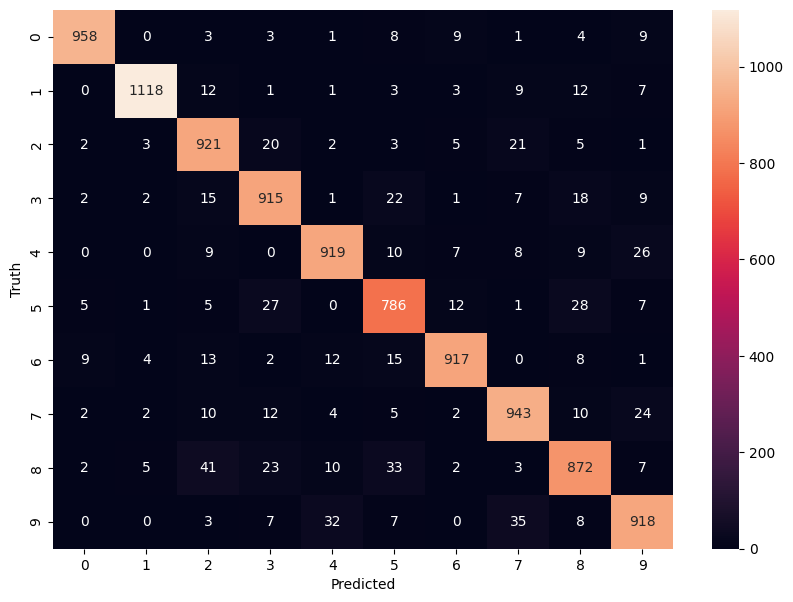

In [24]:

plt.ylabel('Truth')

# Build with more hidden layers

In [29]:
model = keras.Sequential( [
    keras.layers.Dense( 100 , input_shape=(784, ) , activation='relu') ,  ## (hidden layer , input layer)
    keras.layers.Dense(  10  ,  activation='sigmoid') #(output layer)
])

model.compile( 
              optimizer='adam' ,
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy']
              )
model.fit(X_train_flat , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2772 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1301 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0914 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0698 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0556 - accuracy: 0.9831


In [30]:
model.evaluate(X_test_flat , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.9733


[0.08340933173894882, 0.9732999801635742]

Text(0.5, 47.7222222222222, 'Predicted')

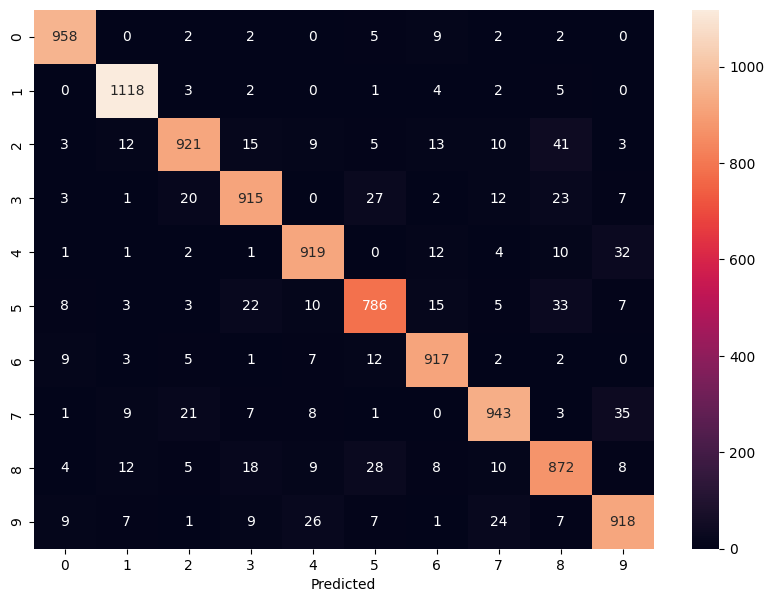

In [31]:
cm = tf.math.confusion_matrix( labels=y_test , predictions=y_pred)

### or ###

# cm = confusion_matrix(y_pred , y_test)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')

# using flatten 

In [36]:
model = keras.Sequential( [
    keras.layers.Flatten(input_shape =  (28,28)) ,# input layer - (60000 , 28 , 28) => (60000 , 784)
    keras.layers.Dense( 100 , activation='relu') ,  ## (hidden layer , input layer)
    keras.layers.Dense(  10  ,  activation='sigmoid') #(output layer)
])

model.compile( 
              optimizer='adamax' ,
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy']
              )
model.fit(X_train , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 5.0557 - accuracy: 0.8525
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2225 - accuracy: 0.9163
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6872 - accuracy: 0.9326
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4407 - accuracy: 0.9426
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3078 - accuracy: 0.9519


In [37]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5271 - accuracy: 0.9400


[0.5270513892173767, 0.9399999976158142]